In [22]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("./data/dataFare.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17144\3558581364.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../data/dataFare.csv")


In [24]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


## TIỀN XỬ LÝ DỮ LIỆU

In [26]:
df.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [27]:
df.dropna(inplace=True)
df.shape

(6339567, 18)

In [28]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['pickup_year'] = df['tpep_pickup_datetime'].dt.year
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

df['dropoff_year'] = df['tpep_dropoff_datetime'].dt.year
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.day
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour


In [29]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
0    6271447
1      68120
Name: count, dtype: int64

In [30]:
df = df[df.trip_distance>0]

In [31]:
df = df[df.passenger_count>0]

In [32]:
df = df[
    (df['fare_amount'] >= 0) &
    (df['extra'] >= 0) &
    (df['mta_tax'] >= 0) &
    (df['tip_amount'] >= 0) &
    (df['tolls_amount'] >= 0) &
    (df['improvement_surcharge'] >= 0) &
    (df['total_amount'] >= 0) &
    (df['congestion_surcharge'] >= 0) 
]

In [33]:
df.shape

(6142816, 26)

In [34]:
numerical_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

def remove_outliers(df):
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - 1.5 * iqr
        fence_high = q3 + 1.5 * iqr
        # Lọc giữ lại các hàng nằm trong khoảng hợp lệ
        df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]
    return df

df_clean = remove_outliers(df)

In [35]:
df_clean.shape

(4544762, 26)

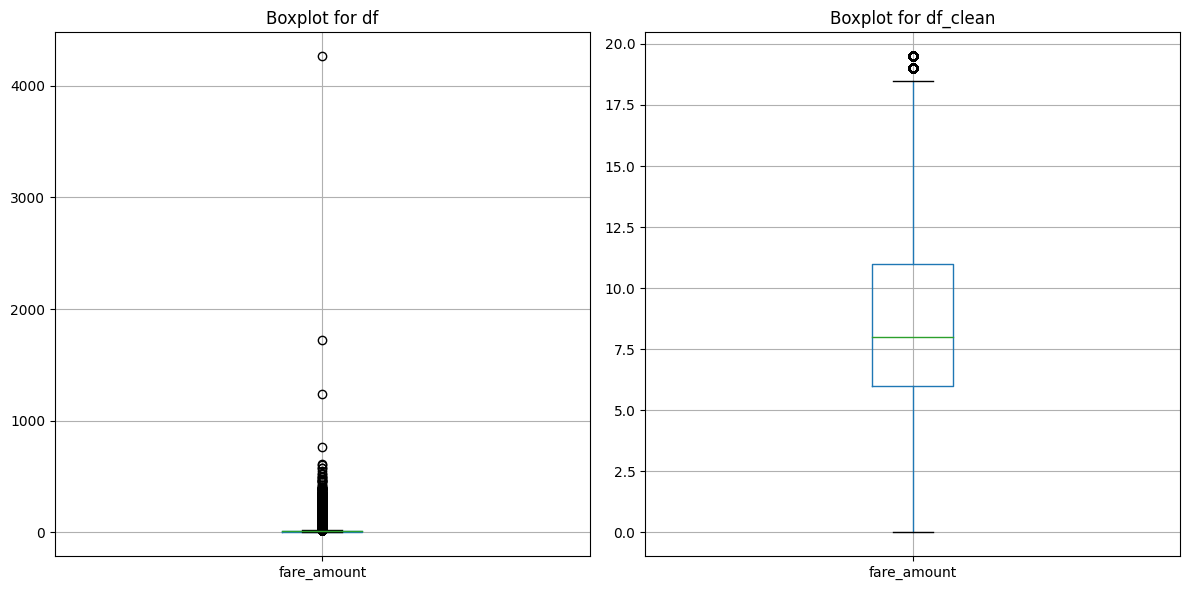

In [36]:
import matplotlib.pyplot as plt

# Tạo một hình với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 hàng, 2 cột, kích thước tổng thể


# Boxplot của df
df[['fare_amount']].boxplot(ax=axes[0])
axes[1].set_title("Boxplot for df_clean")

# Boxplot của df_clean
df_clean[['fare_amount']].boxplot(ax=axes[1])
axes[0].set_title("Boxplot for df")

# Hiển thị
plt.tight_layout()  # Căn chỉnh để các biểu đồ không bị chồng
plt.show()


## EDA

In [37]:
df_clean.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,pickup_year,pickup_month,pickup_day,pickup_hour,dropoff_year,dropoff_month,dropoff_day,dropoff_hour
count,4.544762e+06,4544762,4544762,4.544762e+06,4.544762e+06,4544762.0,4544762.0,4.544762e+06,4.544762e+06,4.544762e+06,...,4.544762e+06,4544762.0,4544762.0,4544762.0,4.544762e+06,4.544762e+06,4544762.0,4544762.0,4.544762e+06,4.544762e+06
mean,1.666096e+00,2020-01-17 05:54:13.410738176,2020-01-17 06:06:49.229180416,1.252213e+00,1.653148e+00,1.0,0.0,1.694075e+02,1.678171e+02,1.247106e+00,...,1.411939e+01,2.5,2020.0,1.0,1.664346e+01,1.395802e+01,2020.0,1.0,1.664946e+01,1.402348e+01
min,1.000000e+00,2020-01-01 00:00:00,2020-01-01 00:02:10,1.000000e+00,1.000000e-02,1.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,...,4.300000e+00,2.5,2020.0,1.0,1.000000e+00,0.000000e+00,2020.0,1.0,1.000000e+00,0.000000e+00
25%,1.000000e+00,2020-01-09 19:01:36.249999872,2020-01-09 19:13:40,1.000000e+00,9.000000e-01,1.0,0.0,1.370000e+02,1.250000e+02,1.000000e+00,...,1.080000e+01,2.5,2020.0,1.0,9.000000e+00,1.000000e+01,2020.0,1.0,9.000000e+00,1.000000e+01
50%,2.000000e+00,2020-01-17 06:46:14,2020-01-17 06:57:13.500000,1.000000e+00,1.400000e+00,1.0,0.0,1.630000e+02,1.630000e+02,1.000000e+00,...,1.350000e+01,2.5,2020.0,1.0,1.700000e+01,1.500000e+01,2020.0,1.0,1.700000e+01,1.500000e+01
75%,2.000000e+00,2020-01-24 19:17:11,2020-01-24 19:29:20,1.000000e+00,2.160000e+00,1.0,0.0,2.340000e+02,2.340000e+02,1.000000e+00,...,1.663000e+01,2.5,2020.0,1.0,2.400000e+01,1.900000e+01,2020.0,1.0,2.400000e+01,1.900000e+01
max,2.000000e+00,2020-01-31 23:58:25,2020-01-31 23:59:59,3.000000e+00,5.760000e+00,1.0,0.0,2.650000e+02,2.650000e+02,3.000000e+00,...,2.580000e+01,2.5,2020.0,1.0,3.100000e+01,2.300000e+01,2020.0,1.0,3.100000e+01,2.300000e+01
std,4.716059e-01,NaN,NaN,5.258055e-01,1.009154e+00,0.0,0.0,6.507470e+01,6.716610e+01,4.377070e-01,...,4.158841e+00,0.0,0.0,0.0,8.785802e+00,5.787812e+00,0.0,0.0,8.785661e+00,5.836317e+00


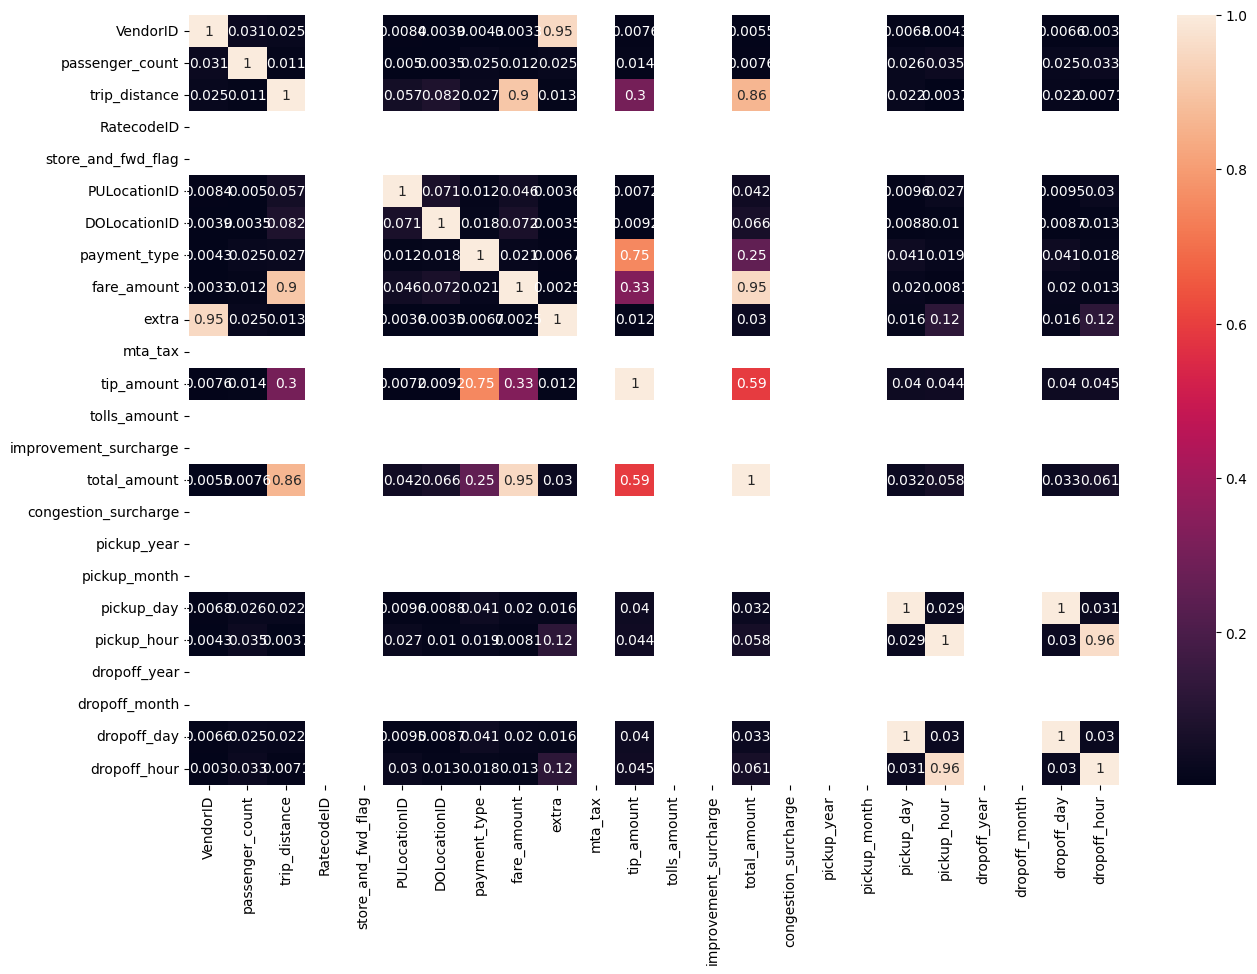

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df_clean[numerical_columns].corr().abs(),annot=True)
plt.show()

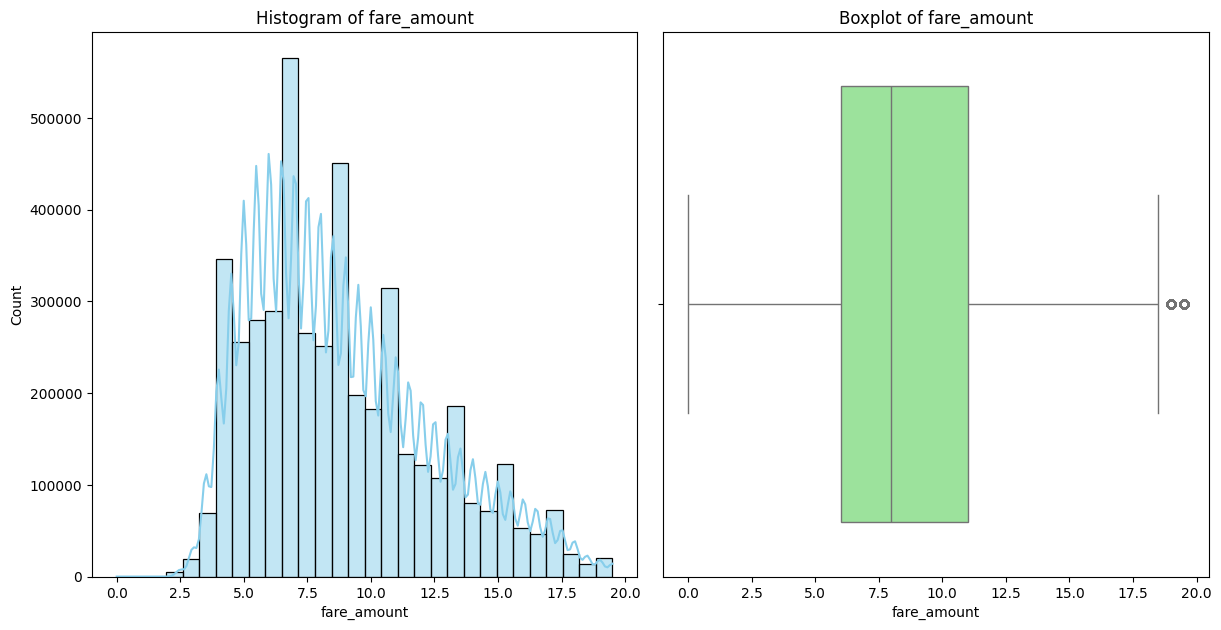

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một figure lớn cho các biểu đồ
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df_clean['fare_amount'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of fare_amount')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_clean['fare_amount'], color='lightgreen')
plt.title('Boxplot of fare_amount')

plt.tight_layout()
plt.show()

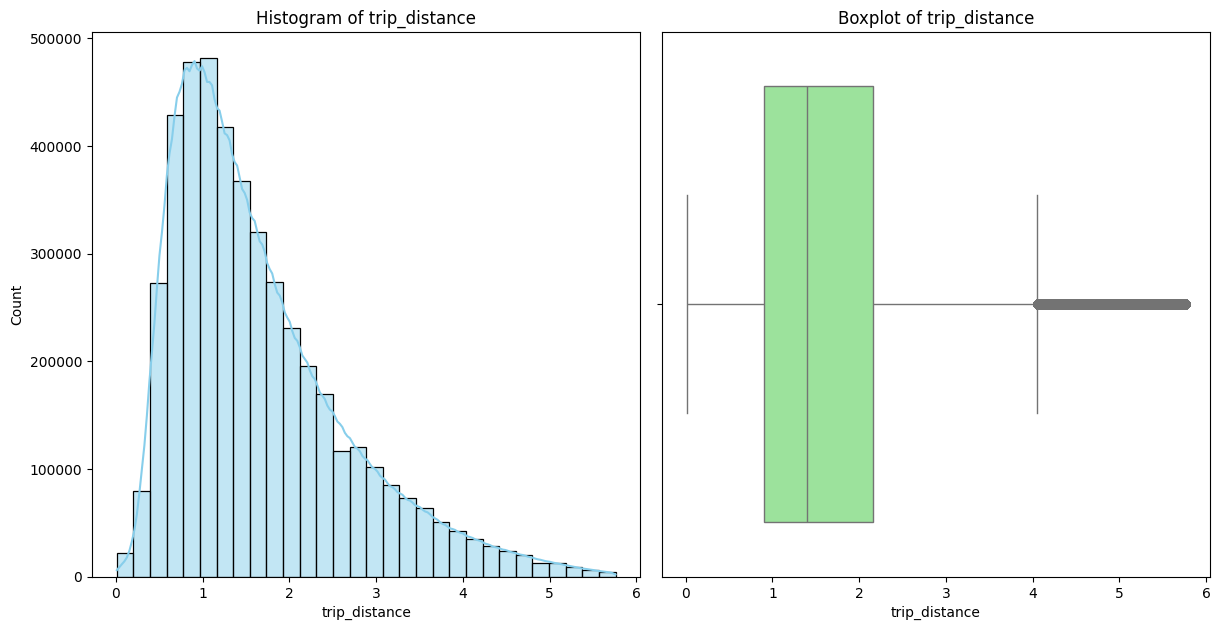

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một figure lớn cho các biểu đồ
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df_clean['trip_distance'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of trip_distance')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_clean['trip_distance'], color='lightgreen')
plt.title('Boxplot of trip_distance')

plt.tight_layout()
plt.show()

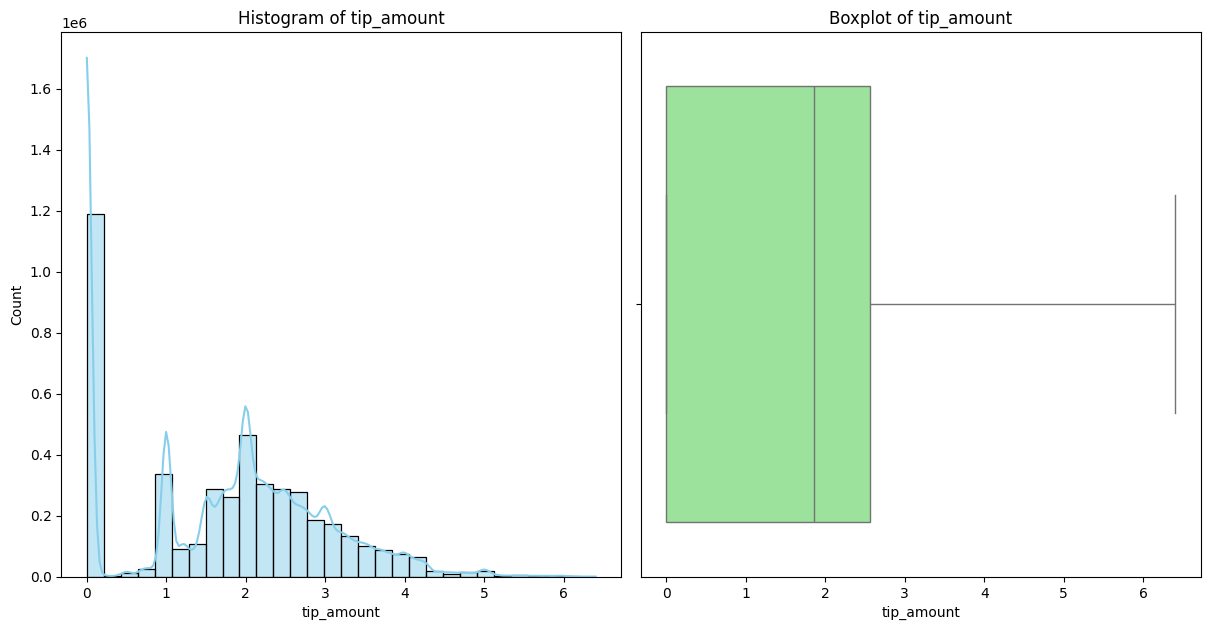

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một figure lớn cho các biểu đồ
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df_clean['tip_amount'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of tip_amount')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_clean['tip_amount'], color='lightgreen')
plt.title('Boxplot of tip_amount')

plt.tight_layout()
plt.show()

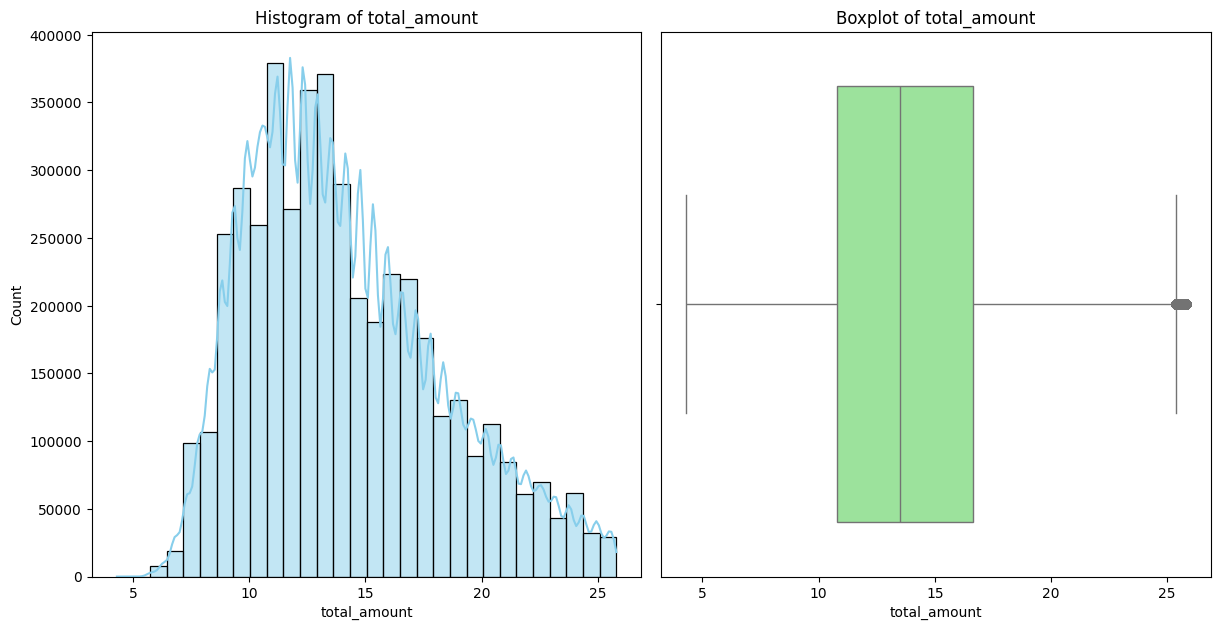

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một figure lớn cho các biểu đồ
plt.figure(figsize=(18, 12))

# Vẽ Histogram và Boxplot cho trip_distance
plt.subplot(2, 3, 1)
sns.histplot(df_clean['total_amount'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of total_amount')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_clean['total_amount'], color='lightgreen')
plt.title('Boxplot of total_amount')

plt.tight_layout()
plt.show()

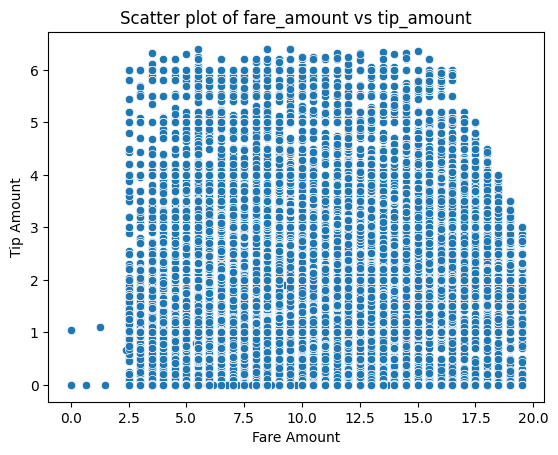

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn có biến fare và tip là hai biến số
sns.scatterplot(data=df_clean, x='fare_amount', y='tip_amount')

# Hiển thị biểu đồ
plt.title('Scatter plot of fare_amount vs tip_amount')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.show()


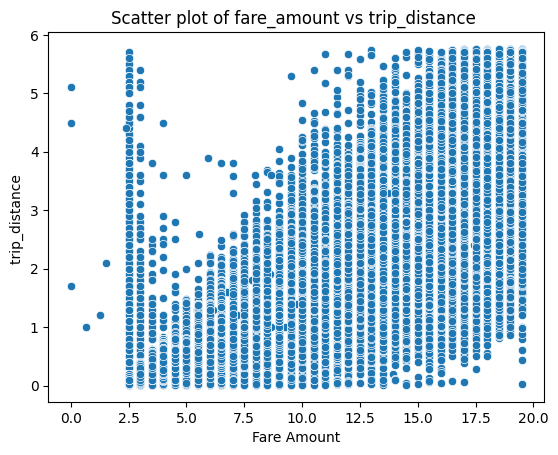

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn có biến fare và tip là hai biến số
sns.scatterplot(data=df_clean, x='fare_amount', y='trip_distance')

# Hiển thị biểu đồ
plt.title('Scatter plot of fare_amount vs trip_distance ')
plt.xlabel('Fare Amount')
plt.ylabel('trip_distance ')
plt.show()


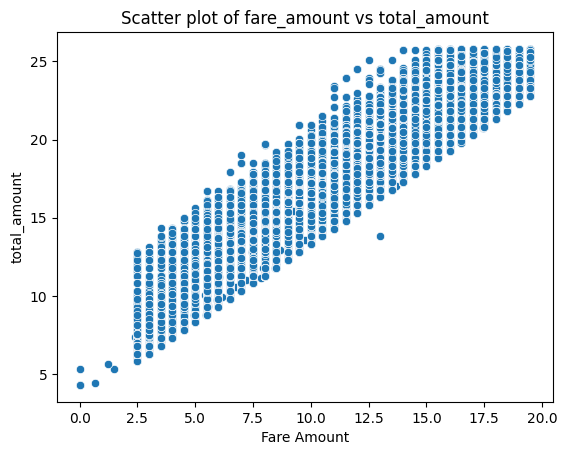

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn có biến fare và tip là hai biến số
sns.scatterplot(data=df_clean, x='fare_amount', y='total_amount')

# Hiển thị biểu đồ
plt.title('Scatter plot of fare_amount vs total_amount')
plt.xlabel('Fare Amount')
plt.ylabel('total_amount')
plt.show()

## MÔ HÌNH

In [46]:
relevant_columns = ['trip_distance','tip_amount','total_amount']

In [47]:
X=df_clean[relevant_columns]
Y=df_clean['fare_amount']

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
[(
"scale",StandardScaler(),relevant_columns
)],remainder="passthrough")

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [50]:
X_train

,trip_distance,tip_amount,total_amount
2739131,0.99,2.06,12.36
899645,1.50,1.50,14.80
2876268,2.43,3.56,21.36
892901,1.90,0.00,14.80
432036,1.81,1.50,15.80
...,...,...,...
1606041,2.00,2.66,15.96
2207227,2.10,2.00,14.30
3131919,2.80,1.00,16.30
6001970,0.50,1.95,11.75


In [51]:
X_test

,trip_distance,tip_amount,total_amount
113535,2.30,3.16,18.96
4440900,0.52,1.00,9.30
4828981,2.45,2.00,15.80
5629275,2.00,2.65,15.95
447190,1.27,2.56,15.36
...,...,...,...
3016904,4.12,0.00,17.30
5669562,1.91,1.00,17.80
246240,1.30,2.26,13.56
1348615,1.49,2.56,15.36


In [52]:
y_train

2739131     7.0
899645     10.0
2876268    13.5
892901     11.5
432036     10.0
           ... 
1606041     9.0
2207227     9.0
3131919    11.5
6001970     5.5
2384314     6.5
Name: fare_amount, Length: 3635809, dtype: float64

In [53]:
y_test

113535     12.5
4440900     5.0
4828981    10.0
5629275     9.5
447190      8.5
           ... 
3016904    14.0
5669562    13.5
246240      8.0
1348615     8.5
181249      6.5
Name: fare_amount, Length: 908953, dtype: float64

In [54]:
from sklearn.metrics import roc_auc_score,roc_curve
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [55]:
X_train_transformed

array([[-0.65714586,  0.28394998, -0.42340616],
       [-0.1520303 , -0.1557965 ,  0.16320308],
       [ 0.76906279,  1.46184235,  1.74031644],
       ...,
       [ 1.13551918, -0.54842729,  0.52382351],
       [-1.14245297,  0.19757121, -0.57005847],
       [-0.84532617, -1.33368886, -1.03886504]])

In [56]:
X_test_transformed

array([[ 0.64030784,  1.14773772,  1.16332375],
       [-1.12264452, -0.54842729, -1.15907185],
       [ 0.78887124,  0.23683429,  0.4036167 ],
       ...,
       [-0.35011483,  0.4410023 , -0.13490981],
       [-0.16193453,  0.67658077,  0.29783471],
       [-0.06289226, -1.33368886, -1.03886504]])

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo mô hình Linear Regression
lr = LinearRegression()

# Huấn luyện mô hình với dữ liệu đã chuẩn hóa
lr.fit(X_train_transformed, y_train)

LinearRegression()

In [58]:
y_pred_lr = lr.predict(X_test_transformed)

In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
mape = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

# In kết quả các chỉ số đánh giá
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'R² (R-squared): {r2}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}')

MAE (Mean Absolute Error): 0.34653434440718744
MSE (Mean Squared Error): 0.15056929822316045
RMSE (Root Mean Squared Error): 0.38803259943355334
R² (R-squared): 0.9879059363752092
MAPE (Mean Absolute Percentage Error): 4.552851386492212


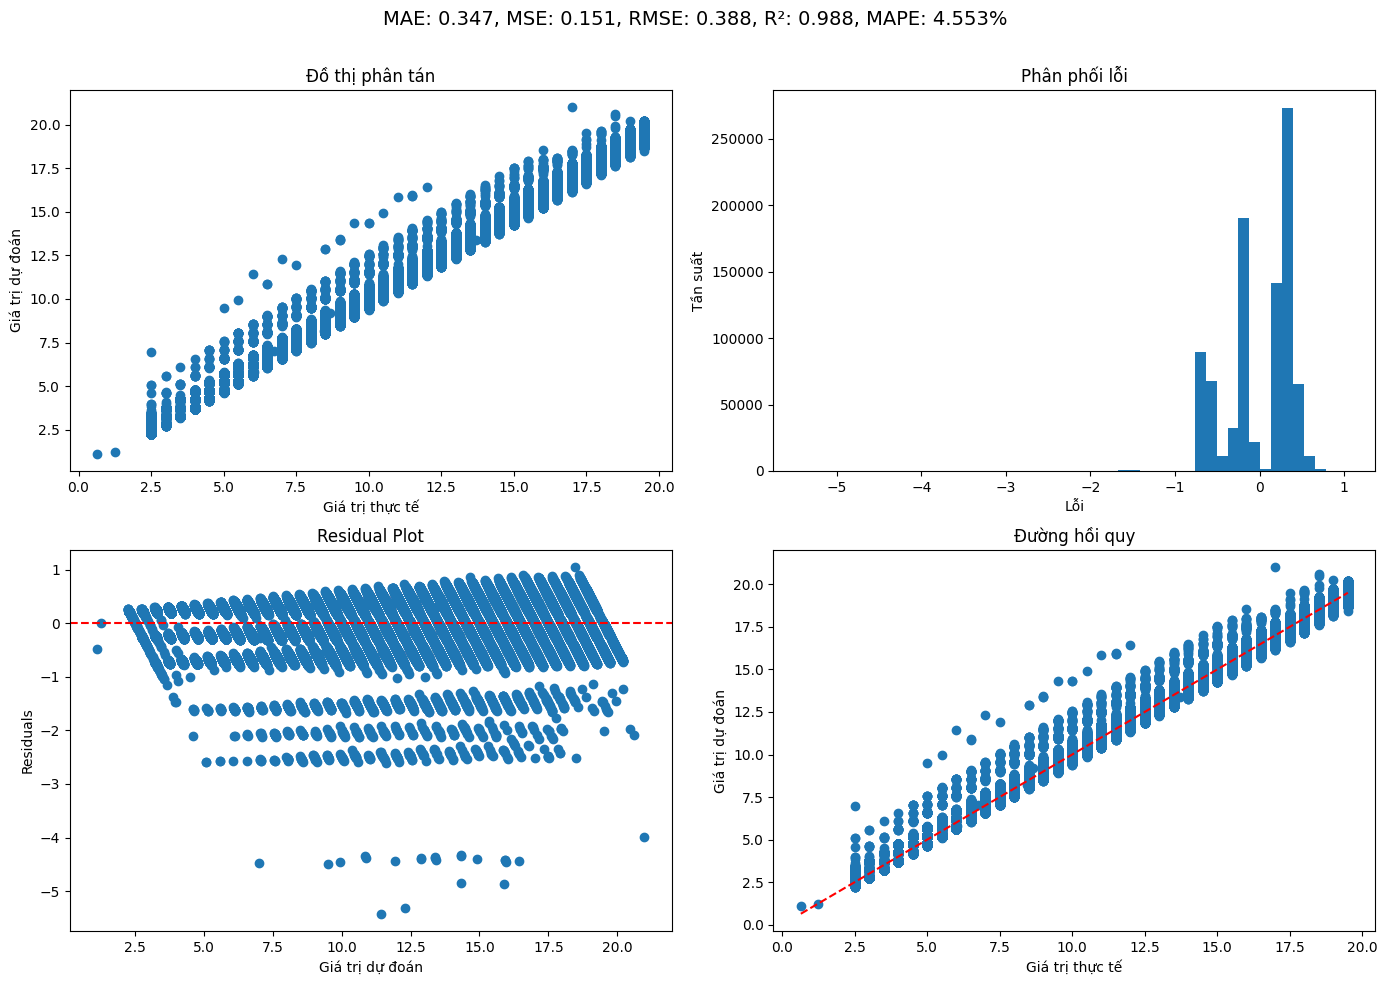

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Giả sử y_test và y_pred_lr là dữ liệu của bạn
# y_test: giá trị thực tế
# y_pred_lr: giá trị dự đoán từ mô hình Linear Regression

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
mape = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

# Tạo subplot với 2 hàng và 2 cột
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Đồ thị phân tán giữa giá trị thực tế và giá trị dự đoán
axes[0, 0].scatter(y_test, y_pred_lr)
# axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường y=x
axes[0, 0].set_title('Đồ thị phân tán')
axes[0, 0].set_xlabel('Giá trị thực tế')
axes[0, 0].set_ylabel('Giá trị dự đoán')

# Đồ thị lỗi (Residuals)
error = y_test - y_pred_lr
axes[0, 1].hist(error, bins=50)
axes[0, 1].set_title('Phân phối lỗi')
axes[0, 1].set_xlabel('Lỗi')
axes[0, 1].set_ylabel('Tần suất')

# Residual plot
axes[1, 0].scatter(y_pred_lr, error)
axes[1, 0].axhline(y=0, color='red', linestyle='--')  # Đường 0 cho dễ nhìn
axes[1, 0].set_title('Residual Plot')
axes[1, 0].set_xlabel('Giá trị dự đoán')
axes[1, 0].set_ylabel('Residuals')

# Đường hồi quy
axes[1, 1].scatter(y_test, y_pred_lr)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường y=x
axes[1, 1].set_title('Đường hồi quy')
axes[1, 1].set_xlabel('Giá trị thực tế')
axes[1, 1].set_ylabel('Giá trị dự đoán')

# In các chỉ số đánh giá mô hình vào trong hình vẽ
fig.suptitle(f'MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}, MAPE: {mape:.3f}%', fontsize=14)

# Hiển thị tất cả các đồ thị
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
mape = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

# In kết quả các chỉ số đánh giá
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'R² (R-squared): {r2}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}')

MAE (Mean Absolute Error): 0.34653434440718744
MSE (Mean Squared Error): 0.15056929822316045
RMSE (Root Mean Squared Error): 0.38803259943355334
R² (R-squared): 0.9879059363752092
MAPE (Mean Absolute Percentage Error): 4.552851386492212


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo mô hình DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

# Huấn luyện mô hình với dữ liệu đã chuẩn hóa
dt_regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [63]:
y_pred_dt = dt_regressor.predict(X_test_transformed)

In [64]:
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)
mape = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100

# In kết quả các chỉ số đánh giá
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'R² (R-squared): {r2}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}')

MAE (Mean Absolute Error): 0.32780125600055904
MSE (Mean Squared Error): 0.1445364754575105
RMSE (Root Mean Squared Error): 0.38017953056090553
R² (R-squared): 0.9883905062259414
MAPE (Mean Absolute Percentage Error): 4.185336590040656


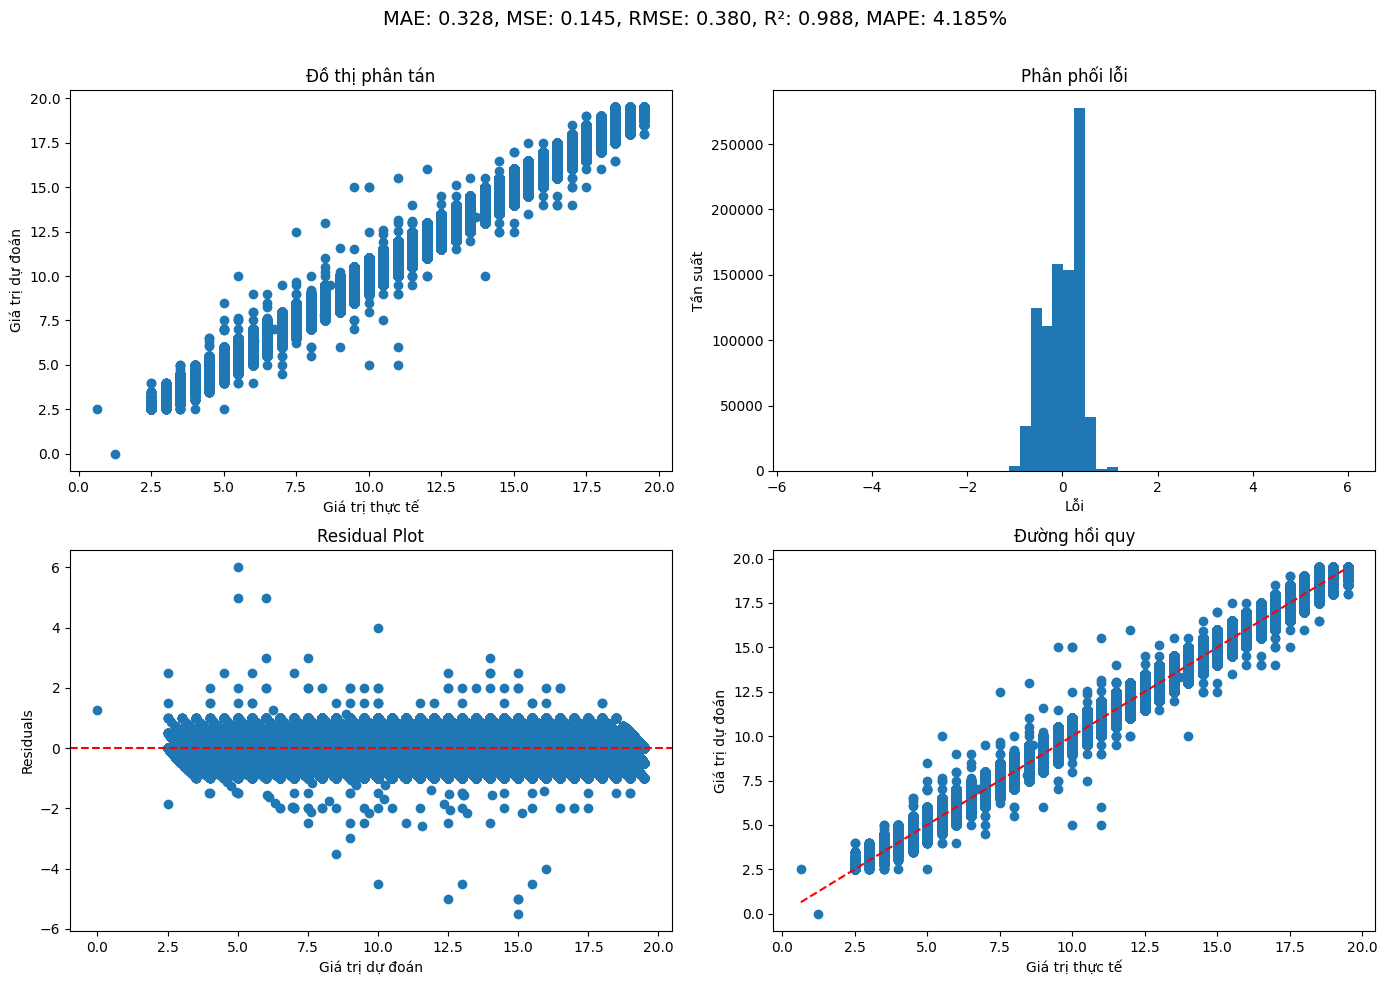

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Giả sử y_test và y_pred_lr là dữ liệu của bạn
# y_test: giá trị thực tế
# y_pred_lr: giá trị dự đoán từ mô hình Linear Regression

mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)
mape = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100

# Tạo subplot với 2 hàng và 2 cột
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Đồ thị phân tán giữa giá trị thực tế và giá trị dự đoán
axes[0, 0].scatter(y_test, y_pred_dt)
# axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường y=x
axes[0, 0].set_title('Đồ thị phân tán')
axes[0, 0].set_xlabel('Giá trị thực tế')
axes[0, 0].set_ylabel('Giá trị dự đoán')

# Đồ thị lỗi (Residuals)
error = y_test - y_pred_dt
axes[0, 1].hist(error, bins=50)
axes[0, 1].set_title('Phân phối lỗi')
axes[0, 1].set_xlabel('Lỗi')
axes[0, 1].set_ylabel('Tần suất')

# Residual plot
axes[1, 0].scatter(y_pred_dt, error)
axes[1, 0].axhline(y=0, color='red', linestyle='--')  # Đường 0 cho dễ nhìn
axes[1, 0].set_title('Residual Plot')
axes[1, 0].set_xlabel('Giá trị dự đoán')
axes[1, 0].set_ylabel('Residuals')

# Đường hồi quy
axes[1, 1].scatter(y_test, y_pred_dt)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường y=x
axes[1, 1].set_title('Đường hồi quy')
axes[1, 1].set_xlabel('Giá trị thực tế')
axes[1, 1].set_ylabel('Giá trị dự đoán')

# In các chỉ số đánh giá mô hình vào trong hình vẽ
fig.suptitle(f'MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}, MAPE: {mape:.3f}%', fontsize=14)

# Hiển thị tất cả các đồ thị
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [66]:
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)
mape = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100

# In kết quả các chỉ số đánh giá
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'R² (R-squared): {r2}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}')

MAE (Mean Absolute Error): 0.32780125600055904
MSE (Mean Squared Error): 0.1445364754575105
RMSE (Root Mean Squared Error): 0.38017953056090553
R² (R-squared): 0.9883905062259414
MAPE (Mean Absolute Percentage Error): 4.185336590040656


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo mô hình RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Huấn luyện mô hình với dữ liệu đã chuẩn hóa
rf_regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [68]:
y_pred_rf = rf_regressor.predict(X_test_transformed)

In [69]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

# In kết quả các chỉ số đánh giá
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'R² (R-squared): {r2}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}')

MAE (Mean Absolute Error): 0.32735418770463526
MSE (Mean Squared Error): 0.141921180903148
RMSE (Root Mean Squared Error): 0.3767242770291663
R² (R-squared): 0.9886005725483011
MAPE (Mean Absolute Percentage Error): 4.180366186038538


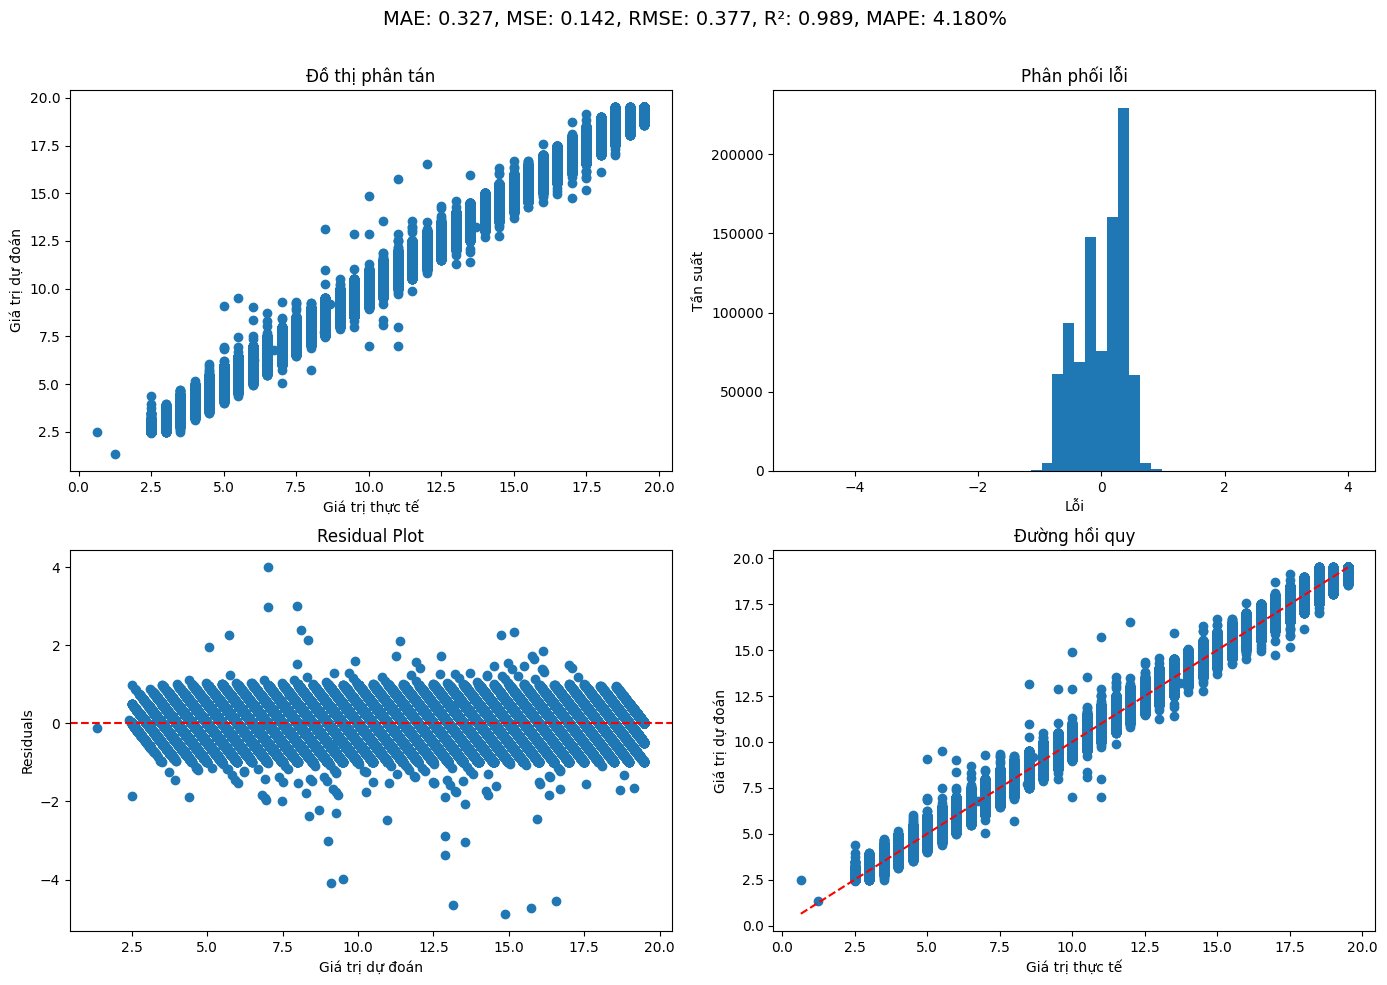

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Giả sử y_test và y_pred_rf là dữ liệu của bạn
# y_test: giá trị thực tế
# y_pred_rf: giá trị dự đoán từ mô hình RandomForestRegressor

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

# Tạo subplot với 2 hàng và 2 cột
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Đồ thị phân tán giữa giá trị thực tế và giá trị dự đoán
axes[0, 0].scatter(y_test, y_pred_rf)
# axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường y=x
axes[0, 0].set_title('Đồ thị phân tán')
axes[0, 0].set_xlabel('Giá trị thực tế')
axes[0, 0].set_ylabel('Giá trị dự đoán')

# Đồ thị lỗi (Residuals)
error = y_test - y_pred_rf
axes[0, 1].hist(error, bins=50)
axes[0, 1].set_title('Phân phối lỗi')
axes[0, 1].set_xlabel('Lỗi')
axes[0, 1].set_ylabel('Tần suất')

# Residual plot
axes[1, 0].scatter(y_pred_rf, error)
axes[1, 0].axhline(y=0, color='red', linestyle='--')  # Đường 0 cho dễ nhìn
axes[1, 0].set_title('Residual Plot')
axes[1, 0].set_xlabel('Giá trị dự đoán')
axes[1, 0].set_ylabel('Residuals')

# Đường hồi quy
axes[1, 1].scatter(y_test, y_pred_rf)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường y=x
axes[1, 1].set_title('Đường hồi quy')
axes[1, 1].set_xlabel('Giá trị thực tế')
axes[1, 1].set_ylabel('Giá trị dự đoán')

# In các chỉ số đánh giá mô hình vào trong hình vẽ
fig.suptitle(f'MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}, MAPE: {mape:.3f}%', fontsize=14)

# Hiển thị tất cả các đồ thị
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo mô hình GradientBoostingRegressor
gbm_regressor = GradientBoostingRegressor()

# Huấn luyện mô hình với dữ liệu đã chuẩn hóa
gbm_regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [72]:
y_pred_gbm = gbm_regressor.predict(X_test_transformed)

In [73]:
# Tính các chỉ số đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred_gbm)
mse = mean_squared_error(y_test, y_pred_gbm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbm)
mape = np.mean(np.abs((y_test - y_pred_gbm) / y_test)) * 100

# In kết quả các chỉ số đánh giá
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'R² (R-squared): {r2}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}')


MAE (Mean Absolute Error): 0.33619427384917844
MSE (Mean Squared Error): 0.15514063450635554
RMSE (Root Mean Squared Error): 0.3938789592074646
R² (R-squared): 0.9875387563955473
MAPE (Mean Absolute Percentage Error): 4.306393507107846


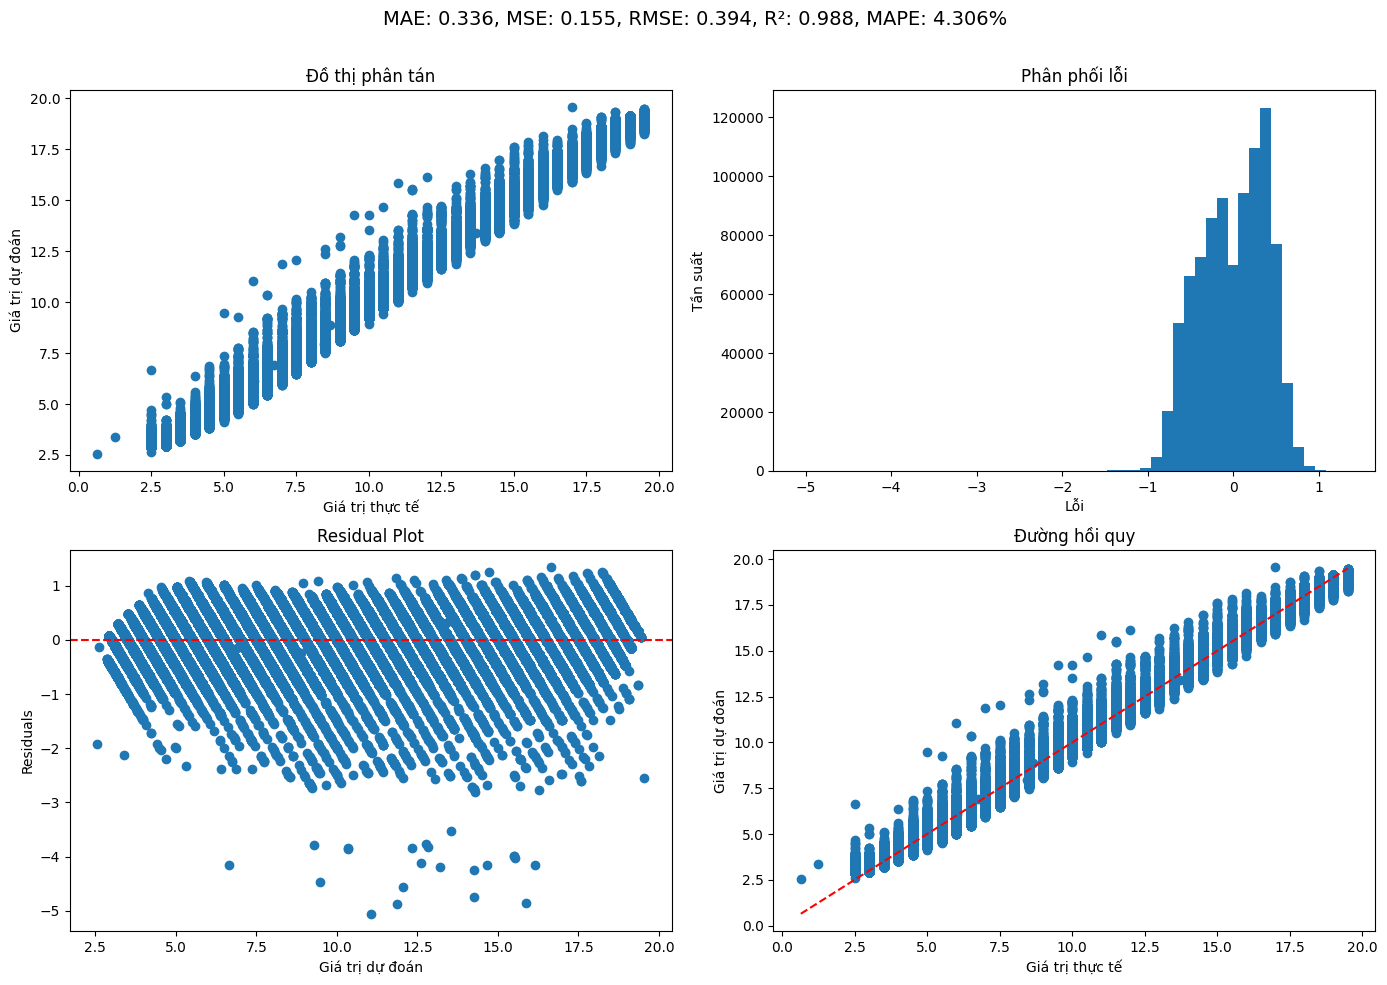

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Giả sử y_test và y_pred_gbm là dữ liệu của bạn
# y_test: giá trị thực tế
# y_pred_gbm: giá trị dự đoán từ mô hình GradientBoostingRegressor

mae = mean_absolute_error(y_test, y_pred_gbm)
mse = mean_squared_error(y_test, y_pred_gbm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbm)
mape = np.mean(np.abs((y_test - y_pred_gbm) / y_test)) * 100

# Tạo subplot với 2 hàng và 2 cột
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Đồ thị phân tán giữa giá trị thực tế và giá trị dự đoán
axes[0, 0].scatter(y_test, y_pred_gbm)
# axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường y=x
axes[0, 0].set_title('Đồ thị phân tán')
axes[0, 0].set_xlabel('Giá trị thực tế')
axes[0, 0].set_ylabel('Giá trị dự đoán')

# Đồ thị lỗi (Residuals)
error = y_test - y_pred_gbm
axes[0, 1].hist(error, bins=50)
axes[0, 1].set_title('Phân phối lỗi')
axes[0, 1].set_xlabel('Lỗi')
axes[0, 1].set_ylabel('Tần suất')

# Residual plot
axes[1, 0].scatter(y_pred_gbm, error)
axes[1, 0].axhline(y=0, color='red', linestyle='--')  # Đường 0 cho dễ nhìn
axes[1, 0].set_title('Residual Plot')
axes[1, 0].set_xlabel('Giá trị dự đoán')
axes[1, 0].set_ylabel('Residuals')

# Đường hồi quy
axes[1, 1].scatter(y_test, y_pred_gbm)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường y=x
axes[1, 1].set_title('Đường hồi quy')
axes[1, 1].set_xlabel('Giá trị thực tế')
axes[1, 1].set_ylabel('Giá trị dự đoán')

# In các chỉ số đánh giá mô hình vào trong hình vẽ
fig.suptitle(f'MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}, MAPE: {mape:.3f}%', fontsize=14)

# Hiển thị tất cả các đồ thị
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
